In [49]:
import math

import pandas as pd
from nltk.stem import PorterStemmer
from nltk import word_tokenize

from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

import utils

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [50]:
stemmer = PorterStemmer()

In [51]:
tdf_g = pd.read_csv('speaker_grouped_trimmed.csv', index_col=0)

In [52]:
tdf_g

,date,speaker,text_enhanced
1696,1994-02-04,CHAIRMAN GREENSPAN.,"As you know, this is our organizational meetin..."
1697,1994-02-04,MR. BERNARD.,"Secretary and Economist, Donald Kohn; Deputy S..."
1698,1994-02-04,MR. BOEHNE.,"Normally in an economic expansion, development..."
1699,1994-02-04,MR. BROADDUS.,My report is going to be pretty bland after th...
1700,1994-02-04,MR. COYNE.,"Oh, believe me, you will get asked! I think i..."
...,...,...,...
6827,2017-12-13,MS. BRAINARD.,I don't think of this as a normative statement...
6828,2017-12-13,MS. GEORGE.,"Lorie, on exhibit 2, chart 12, would you expla..."
6829,2017-12-13,MS. LOGAN.,Thank you. I will begin on your second exhibi...
6830,2017-12-13,MS. MESTER.,"Thank you, Madam Chair. Reports received from..."


In [53]:
tdf_g['tokens'] = tdf_g['text_enhanced'].apply(lambda x : utils.process(x, stemmer=stemmer)) 

In [54]:
texts = tdf_g['tokens'].tolist()

In [55]:
dictionary = Dictionary().load('12-10dict')

In [56]:
len(dictionary)

10957

In [57]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [58]:
K = 45

In [59]:
ldamodel = LdaModel(corpus, num_topics=K, id2word=dictionary, passes=10, random_state=0, minimum_probability=0, eta=0.025, alpha=50/K)

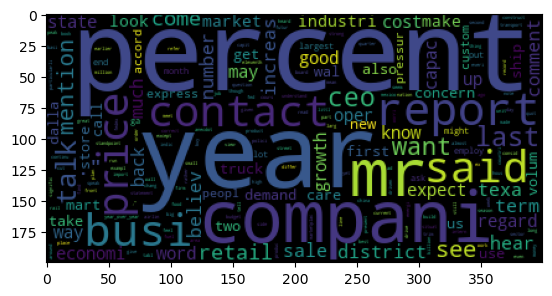

In [75]:
plt.imshow(WordCloud().fit_words(dict(ldamodel.show_topic(15, 200))))

In [ ]:
ldamodel.print_topics(num_topics=45, num_words=10)

In [76]:
def get_all_topics(tokens):
    topic_probs = ldamodel[dictionary.doc2bow(tokens)]
    result = [0] * 45
    for topic, prob in topic_probs:
        result[topic] = prob
    return pd.Series(result)

In [77]:
tdf_g[[f'tprob_{i}' for i in range(45)]] = tdf_g.tokens.apply(get_all_topics)

In [ ]:
tdf_g

In [ ]:
tdf_g['tokens']

EVENTUALLY FIX THIS TO ONLY INCLUDE WORDS NOT PRUNED BY TF-IDF

In [78]:
tdf_g['len'] = tdf_g['tokens'].apply(len)

In [79]:
tdf_g.to_csv('grouped_w_topics.csv')